## 边缘检测

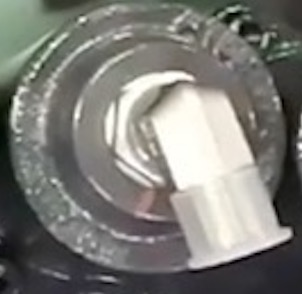

In [28]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
im = cv2.imread('main_valve.04.jpg')
#plt.imshow(im[:,:,::-1])
Image.fromarray(im[:,:,::-1])

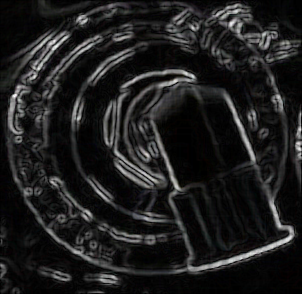

In [29]:
size=3
gx = cv2.Sobel(im, cv2.CV_64F, 1, 0, ksize=size)
gx = cv2.convertScaleAbs(gx)
gy = cv2.Sobel(im, cv2.CV_64F, 0, 1, ksize=size)
gy = cv2.convertScaleAbs(gy)

g = cv2.addWeighted(gx,0.5,gy,0.5,0)
#plt.imshow(g)
Image.fromarray(g)

## 直线检测

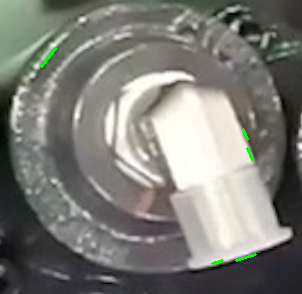

In [30]:
import numpy as np
img = im.copy()
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
gray = (g>120).astype(np.uint8)*255
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

minLineLength = 50
maxLineGap = 10

lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 30, minLineLength, maxLineGap)
#print("Len of lines:", len(lines))
# print(lines)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

Image.fromarray(img[:,:,::-1])

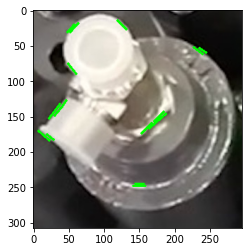

In [131]:
plt.imshow(img[:,:,::-1])

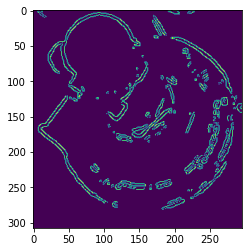

In [132]:
plt.imshow(edges)

In [72]:
np.unique(gray)

array([0], dtype=uint8)

In [58]:
np.unique(g>127)

array([False,  True])

In [71]:
gray

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

## 模板匹配

In [7]:
img_rgb = cv2.imread('main_valve.01.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('temp01.jpg', 0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.7

loc = np.where(res >= threshold)
print(len(loc))

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)
    print("rectangle 1")

NameError: name 'np' is not defined

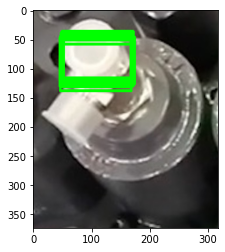

In [148]:
plt.imshow(img_rgb[:,:,::-1])

In [143]:
loc

(array([330, 331, 331, 332, 332, 332, 333, 333, 333, 333, 334, 334, 334,
        334, 335, 335, 335, 335, 336, 336, 336, 336, 337, 337, 337, 337,
        337, 338, 338, 338, 338, 338, 339, 339, 339, 339, 340, 340, 340]),
 array([408, 407, 408, 407, 408, 409, 406, 407, 408, 409, 406, 407, 408,
        409, 406, 407, 408, 409, 406, 407, 408, 409, 405, 406, 407, 408,
        409, 405, 406, 407, 408, 409, 406, 407, 408, 409, 406, 407, 408]))

## 特征点匹配

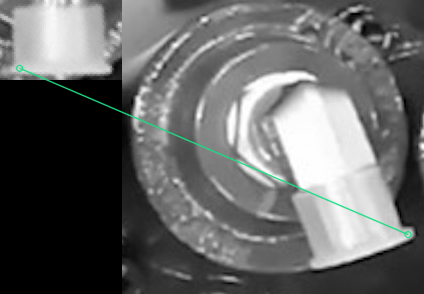

In [35]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img2 = cv2.imread('main_valve.04.jpg', 0)
# queryImage
img1 = cv2.imread('temp01.jpg', 0)  # trainImage
# Initiate SIFT detector
# sift = cv2.SIFT()
sift = cv2.xfeatures2d.SIFT_create()


# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
# 比值测试，首先获取与 A距离最近的点 B （最近）和 C （次近），
# 只有当 B/C 小于阀值时（0.75）才被认为是匹配，
# 因为假设匹配是一一对应的，真正的匹配的理想距离为0
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
# img3 = np.ndarray([2, 2])
# img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good[:10], img3, flags=2)

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

Image.fromarray(img3[:,:,::-1])

## 形状匹配

In [3]:
#性状匹配
img1 = cv2.imread('main_valve.jpg')
img2 = cv2.imread('temp01.jpg')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(gray1, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
#cv2.imshow('thresh1', thresh1)

gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, thresh2 = cv2.threshold(gray2, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
#cv2.imshow('thresh2', thresh2)

copyImage1, contours1, hierarchy1 = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
copyImage2, contours2, hierarchy2 = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt1 = contours1[0]

for i, cnt in enumerate(contours2):
    print(i)
    #找到性状的重心
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    print(cx, cy)
    cv2.circle(img2, (cx, cy), 5, (255,255,255), -1)
    #性状匹配
    ret = cv2.matchShapes(cnt1, cnt, 1, 0.0)
    print(ret)
    cv2.imshow('img'+str(i), gray2)

0


ZeroDivisionError: float division by zero

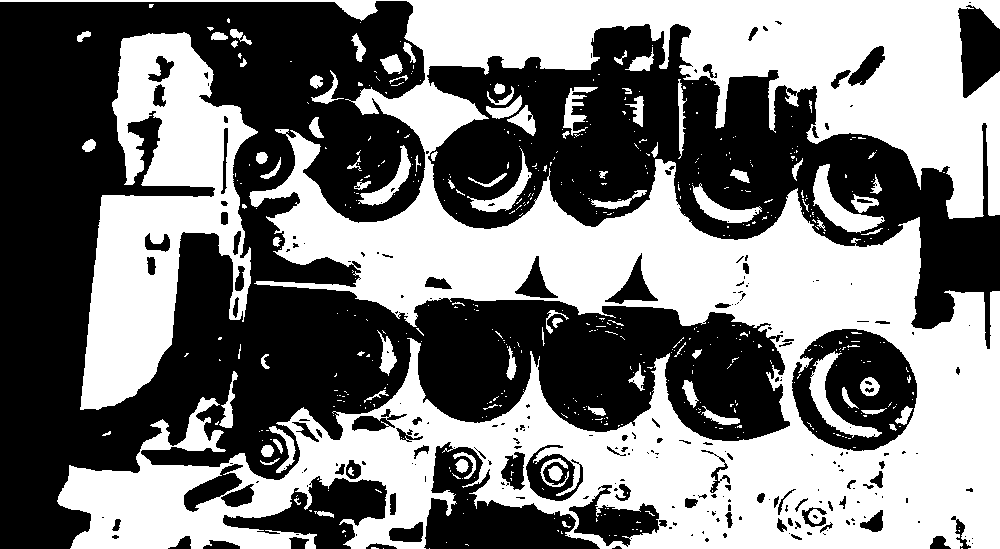

In [6]:
Image.fromarray(thresh1)